In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cPickle as cp
import sys
sys.path.append("../../utils")
from misc_utils import expected_loss
import os
from copy import deepcopy
from plotting_performance_vs_metric import get_closeness, get_log_closeness, get_spectrum
from plotting_performance_vs_metric import get_measurement_metric, get_performance_metric, average_results_array
from plotting_performance_vs_metric import get_rff_memory, get_nystrom_memory
import math

### find the best lambda for exact kernel in real setting

### test cross entropy

In [2]:
def get_performance_metric(folder_name, file_name, min_best=True):
#     print folder_name
#     print "check function path"
    if os.path.isfile(folder_name + "/" + file_name):
        with open(folder_name + "/" + file_name, "r") as f:
            metrics = np.loadtxt(f)
        if min_best:
            metric = np.nanmin(metrics[0:150] )
        else:
            metric = np.nanmax(metrics[0:150] )
    else:
        print folder_name, file_name, " is not found."
        metric = None
    return metric

In [3]:
l2_reg_list = ["1e-05", "5e-05", "0.0001", "0.0005", "0.001", "0.005", "0.01", "0.05", "0.1"]
# l2_reg_list = ["1e-5", "1e-4", "1e-3", "1e-2", "1e-1"]
eval_list = []
lr_list = []
reg_list = []
general_folder = "/dfs/scratch0/zjian/lp_kernel/closeness/classification_real_setting"
for l2_reg in l2_reg_list:
    for lr in [5, 10, 50, 100]:
        folder_name = general_folder + "/covtype_type_nystrom_l2_reg_" + l2_reg + "_n_fp_feat_20000_opt_sgd_lr_" + str(lr) + "_seed_1"
        file_name = "monitor_signal.txt"
        eval_metric = get_performance_metric(folder_name, file_name)
        eval_list.append(eval_metric)
        lr_list.append(lr)
        reg_list.append(l2_reg)
print eval_list
print lr_list
print reg_list
print np.nanargmax(eval_list)
print "lambda star ", reg_list[np.nanargmin(eval_list)], lr_list[np.nanargmin(eval_list)], np.nanmin(eval_list)

[0.0013924434803337634, 0.0013544500827033384, 0.0039151182622001257, 0.0095452854096585629, 0.0015867647987401715, 0.0015253978384517973, 0.020654377804259973, 0.041817411350995363, 0.0017661830916531518, 0.0021230266187850454, 0.022252730986813046, 0.1164356766677701, 0.0020717298257723559, 0.0064047088671972474, 0.0021526947126236443, 0.010685241317159411, 0.002372921758555011, 0.0067957253402271024, 0.0097079529571667839, 0.020306070890369083, 0.00362505338758455, 0.0072083507670335778, 0.036790143322237352, 0.11551671738463197, 0.0039129775810904811, 0.0075460465238057321, 0.057758358703111697, 0.19756498971416137, 0.0049007935853769948, 0.01176817013321675, 17720829154617.027, 3.5468073143136387e+46, 0.0060565253596500529, 0.019755439850354089, 1.7724271989123495e+46, 1.3214390411535561e+74]
[5, 10, 50, 100, 5, 10, 50, 100, 5, 10, 50, 100, 5, 10, 50, 100, 5, 10, 50, 100, 5, 10, 50, 100, 5, 10, 50, 100, 5, 10, 50, 100, 5, 10, 50, 100]
['1e-05', '1e-05', '1e-05', '1e-05', '5e-05', 

### test accuracy

In [4]:
l2_reg_list = ["1e-05", "5e-05", "0.0001", "0.0005", "0.001", "0.005", "0.01", "0.05", "0.1"]
# l2_reg_list = ["1e-5", "1e-4", "1e-3", "1e-2", "1e-1"]
eval_list = []
lr_list = []
reg_list = []
general_folder = "/dfs/scratch0/zjian/lp_kernel/closeness/classification_real_setting"
for l2_reg in l2_reg_list:
    for lr in [5, 10, 50, 100]:
        folder_name = general_folder + "/covtype_type_nystrom_l2_reg_" + l2_reg + "_n_fp_feat_20000_opt_sgd_lr_" + str(lr) + "_seed_1"
        file_name = "eval_metric.txt"
        eval_metric = get_performance_metric(folder_name, file_name, min_best=False)
        eval_list.append(eval_metric)
        lr_list.append(lr)
        reg_list.append(l2_reg)
print eval_list
# print l2_reg_list
print lr_list
print reg_list
print np.nanargmax(eval_list)
print "lambda star ", reg_list[np.nanargmax(eval_list)], lr_list[np.nanargmax(eval_list)], np.nanmax(eval_list)

[0.85085, 0.85840000000000005, 0.84284999999999999, 0.82240000000000002, 0.82974999999999999, 0.84209999999999996, 0.52690000000000003, 0.50509999999999999, 0.79744999999999999, 0.77969999999999995, 0.50319999999999998, 0.50885000000000002, 0.81464999999999999, 0.49370000000000003, 0.77780000000000005, 0.50885000000000002, 0.64605000000000001, 0.49114999999999998, 0.49114999999999998, 0.49114999999999998, 0.49114999999999998, 0.49114999999999998, 0.49114999999999998, 0.49114999999999998, 0.49114999999999998, 0.49114999999999998, 0.49114999999999998, 0.49114999999999998, 0.49114999999999998, 0.49114999999999998, 0.50885000000000002, 0.50885000000000002, 0.49114999999999998, 0.49114999999999998, 0.50885000000000002, 0.50885000000000002]
[5, 10, 50, 100, 5, 10, 50, 100, 5, 10, 50, 100, 5, 10, 50, 100, 5, 10, 50, 100, 5, 10, 50, 100, 5, 10, 50, 100, 5, 10, 50, 100, 5, 10, 50, 100]
['1e-05', '1e-05', '1e-05', '1e-05', '5e-05', '5e-05', '5e-05', '5e-05', '0.0001', '0.0001', '0.0001', '0.0001

### plot spectrum from nystrom and rff

In [5]:
folder_name = "/dfs/scratch0/zjian/lp_kernel/closeness/classification_real_setting/covtype_with_metric_type_nystrom_l2_reg_1e-05_n_fp_feat_10000_opt_sgd_lr_10_seed_1"
file_name = "spectrum_train_exact.npy"
exact_spectrum = get_spectrum(folder_name, file_name)
print exact_spectrum

[  1.74233900e+02   1.11410820e+02   1.02201289e+02 ...,   9.90639828e-05
   8.28420727e-05   2.85016767e-05]


[  1.69547203e+02   1.05877383e+02   9.73468512e+01 ...,   5.56123380e-15
   4.66476448e-15   1.84515098e-15]


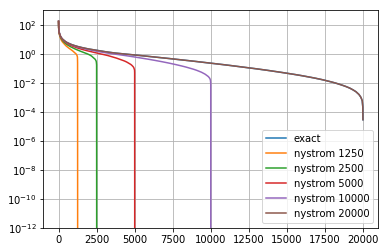

In [6]:
n_nystrom_feat = [1250, 2500, 5000, 10000, 20000]
general_folder = "/dfs/scratch0/zjian/lp_kernel/closeness/classification_real_setting"
plt.figure()
plt.semilogy(exact_spectrum, label="exact")
for n_feat in n_nystrom_feat:
    folder_name = general_folder + "/covtype_with_metric_type_nystrom_l2_reg_1e-05_n_fp_feat_" + str(n_feat) + "_opt_sgd_lr_10_seed_1"

#     folder_name = general_folder + "/census_type_nystrom_l2_reg_0.0_n_fp_feat_" + str(n_feat) + "_opt_sgd_lr_0.5_seed_1"
    file_name = "spectrum_train.npy"
    spectrum = get_spectrum(folder_name, file_name)
    plt.semilogy(spectrum, label="nystrom " + str(n_feat) )
    
    if n_feat == 1250:
        print spectrum
    
plt.grid()
plt.ylim([1e-12, 1e3] )
plt.legend()
plt.show()

[  1.99232654e+02   1.22112599e+02   1.20287029e+02 ...,   7.10353309e-15
   5.40672725e-15   4.38637827e-15]


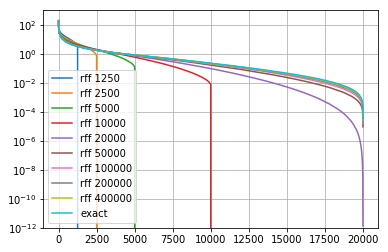

In [7]:
n_rff_feat = [1250, 2500, 5000, 10000, 20000, 50000, 100000, 200000, 400000]
general_folder = "/dfs/scratch0/zjian/lp_kernel/closeness/classification_real_setting"
plt.figure()
for n_feat in n_rff_feat:
    folder_name = general_folder + "/covtype_with_metric_type_rff_l2_reg_1e-05_n_fp_feat_" + str(n_feat) + "_opt_sgd_lr_10_seed_1"
    file_name = "spectrum_train.npy"
    spectrum = get_spectrum(folder_name, file_name)
    plt.semilogy(spectrum, label="rff " + str(n_feat) )
    
    if n_feat == 1250:
        print spectrum
    
plt.semilogy(exact_spectrum, label="exact")

    
plt.grid()
plt.ylim([1e-12, 1e3] )
plt.legend()
plt.show()

### plot performance v.s. approximation error

In [8]:
# need to customize to deal with python 3 saved files
def get_spectrum(folder_name, file_name):
    if os.path.isfile(folder_name + "/" + file_name):
        with open(folder_name + "/" + file_name, "rb") as f:
            spectrum = np.load(f)
        if spectrum[0] < spectrum[-1]:
            print spectrum[0], spectrum[-1]
            spectrum = spectrum[::-1]
    else:
        print folder_name, file_name, " is not found."
        spectrum = None
    return spectrum

def get_performance_metric(folder_name, file_name, min_best=True):
#     print folder_name
    if os.path.isfile(folder_name + "/" + file_name):
        with open(folder_name + "/" + file_name, "rb") as f:
            metrics = np.loadtxt(f)
        if min_best:
            metric = np.nanmin(metrics)
        else:
            metric = np.nanmax(metrics)
    else:
        print folder_name, file_name, " is not found."
        metric = None
    return metric

def get_measurement_metric(folder_name, file_name, metric_name):
#     print folder_name
    if os.path.isfile(folder_name + "/" + file_name):
        with open(folder_name + "/" + file_name, "rb") as f:
            metrics = cp.load(f)
        metric = metrics[metric_name]
    else:
        print folder_name, file_name, " is not found."
        metric = None
    return metric

In [9]:
EPS = 1e-20

In [20]:
def plot_l2_vs_measurement(lamb=0.0, seeds=[1,], 
                           rff_mem_func=None, nystrom_mem_func=None,
                           do_cross_ent=True):
    n_rff_feat = [1250, 2500, 5000, 10000, 20000, 50000, 100000, 200000, 400000]
    general_folder_measurement = "/dfs/scratch0/zjian/lp_kernel/closeness/classification_real_setting"
    general_folder_performance = "/dfs/scratch0/zjian/lp_kernel/closeness/classification_real_setting"
    general_folder_delta = "/dfs/scratch0/zjian/lp_kernel/symmetric_delta/classification_real_setting"
    # plt.figure()
    f_norm_list_rff = []
    spectral_norm_list_rff = []
    closeness_list_rff = []
    log_closeness_list_rff = []
    cross_ent_loss_list_rff = []
    delta_list_rff = []
    
    for seed in seeds:
        f_norm_list = []
        spectral_norm_list = []
        closeness_list = []
        log_closeness_list = []
        cross_ent_loss_list = []
        delta_list = []
        for n_feat in n_rff_feat:
            folder_name = general_folder_measurement + "/covtype_with_metric_type_rff_l2_reg_" + str(lamb) + "_n_fp_feat_" + str(n_feat) + "_opt_sgd_lr_10_seed_" + str(seed)
            file_name = "spectrum_eval.npy"
            spectrum = get_spectrum(folder_name, file_name)
            
            file_name = "spectrum_eval_exact.npy"
            exact_spectrum = get_spectrum(folder_name, file_name)

            file_name = "metric_sample_eval.txt"
            metric_name = "F_norm_error"
            f_norm_error = get_measurement_metric(folder_name, file_name, metric_name)
            f_norm_list.append(f_norm_error)

            metric_name = "spectral_norm_error"
            spectral_norm_error = get_measurement_metric(folder_name, file_name, metric_name)
            spectral_norm_list.append(spectral_norm_error)

            closeness = get_closeness(spectrum, exact_spectrum, lamb=float(lamb) + EPS)
            closeness_list.append(closeness)

            log_closeness = get_log_closeness(spectrum, exact_spectrum, lamb=float(lamb) + EPS)
            log_closeness_list.append(log_closeness)   
            
#             print "ckpt ", log_closeness_list
            
            folder_name = general_folder_performance + "/covtype_with_metric_type_rff_l2_reg_" + str(lamb) + "_n_fp_feat_" + str(n_feat) + "_opt_sgd_lr_10_seed_" + str(seed)
            if do_cross_ent:
                file_name = "monitor_signal.txt"
                cross_ent_loss = get_performance_metric(folder_name, file_name, min_best=True)
            else:
                file_name = "eval_metric.txt"
                cross_ent_loss = get_performance_metric(folder_name, file_name, min_best=False)
            cross_ent_loss_list.append(cross_ent_loss)

            folder_name = general_folder_delta + "/covtype_with_metric_type_rff_l2_reg_" + str(lamb) + "_n_fp_feat_" + str(n_feat) + "_opt_sgd_lr_10_seed_" + str(seed)
            file_name = "metric_sample_eval.txt"
            metric_name = "Delta"
            delta = get_measurement_metric(folder_name, file_name, metric_name)
            delta_list.append(delta)            
        
        f_norm_list_rff.append(np.array(deepcopy(f_norm_list) ) )
        spectral_norm_list_rff.append(np.array(deepcopy(spectral_norm_list) ) )
        closeness_list_rff.append(np.array(deepcopy(closeness_list) ) )
        log_closeness_list_rff.append(np.array(deepcopy(log_closeness_list) ) )
        cross_ent_loss_list_rff.append(np.array(deepcopy(cross_ent_loss_list) ) )
        delta_list_rff.append(np.array(deepcopy(delta_list) ) )        
        
    f_norm_list_rff = average_results_array(f_norm_list_rff)
    spectral_norm_list_rff = average_results_array(spectral_norm_list_rff)
    closeness_list_rff = average_results_array(closeness_list_rff)
    log_closeness_list_rff = average_results_array(log_closeness_list_rff)
    cross_ent_loss_list_rff = average_results_array(cross_ent_loss_list_rff)
    
    delta_list_rff = average_results_array(delta_list_rff)    
    memory_list_rff = np.array( [rff_mem_func(n_feat) for n_feat in n_rff_feat] )
    
    
#     print "int average rff ", log_closeness_list_rff

    
    # get info for nystrom method
    n_nystrom_feat = [1250, 2500, 5000, 10000, 20000]
    general_folder_measurement = "/dfs/scratch0/zjian/lp_kernel/closeness/classification_real_setting"
    general_folder_performance = "/dfs/scratch0/zjian/lp_kernel/closeness/classification_real_setting"
    general_folder_delta = "/dfs/scratch0/zjian/lp_kernel/symmetric_delta/classification_real_setting"
    # plt.figure()
    f_norm_list_nystrom = []
    spectral_norm_list_nystrom = []
    closeness_list_nystrom = []
    log_closeness_list_nystrom = []
    cross_ent_loss_list_nystrom = []
    delta_list_nystrom = []
    
    for seed in seeds:
        f_norm_list = []
        spectral_norm_list = []
        closeness_list = []
        log_closeness_list = []
        cross_ent_loss_list = []
        delta_list = []
        for n_feat in n_nystrom_feat:
            folder_name = general_folder_measurement + "/covtype_with_metric_type_nystrom_l2_reg_" + str(lamb) + "_n_fp_feat_" + str(n_feat) + "_opt_sgd_lr_10_seed_" + str(seed)
            file_name = "spectrum_eval.npy"
            spectrum = get_spectrum(folder_name, file_name)

            file_name = "spectrum_eval_exact.npy"
            exact_spectrum = get_spectrum(folder_name, file_name)
            
            file_name = "metric_sample_eval.txt"
            metric_name = "F_norm_error"
            f_norm_error = get_measurement_metric(folder_name, file_name, metric_name)
            f_norm_list.append(f_norm_error)

            metric_name = "spectral_norm_error"
            spectral_norm_error = get_measurement_metric(folder_name, file_name, metric_name)
            spectral_norm_list.append(spectral_norm_error)

            closeness = get_closeness(spectrum, exact_spectrum, lamb=float(lamb) + EPS)
            closeness_list.append(closeness)

            log_closeness = get_log_closeness(spectrum, exact_spectrum, lamb=float(lamb) + EPS)
            log_closeness_list.append(log_closeness)
            
#             print log_closeness_list            

            folder_name = general_folder_performance + "/covtype_with_metric_type_nystrom_l2_reg_" + str(lamb) + "_n_fp_feat_" + str(n_feat) + "_opt_sgd_lr_10_seed_" + str(seed)
            if do_cross_ent:
                file_name = "monitor_signal.txt"
                cross_ent_loss = get_performance_metric(folder_name, file_name, min_best=True)
            else:
                file_name = "eval_metric.txt"
                cross_ent_loss = get_performance_metric(folder_name, file_name, min_best=False)
            cross_ent_loss_list.append(cross_ent_loss)

            folder_name = general_folder_delta + "/covtype_with_metric_type_nystrom_l2_reg_" + str(lamb) + "_n_fp_feat_" + str(n_feat) + "_opt_sgd_lr_10_seed_" + str(seed)
            file_name = "metric_sample_eval.txt"
            metric_name = "Delta"
            delta = get_measurement_metric(folder_name, file_name, metric_name)
            delta_list.append(delta)
                        
        f_norm_list_nystrom.append(np.array(deepcopy(f_norm_list) ) )
        spectral_norm_list_nystrom.append(np.array(deepcopy(spectral_norm_list) ) )
        closeness_list_nystrom.append(np.array(deepcopy(closeness_list) ) )
        log_closeness_list_nystrom.append(np.array(deepcopy(log_closeness_list) ) )
        cross_ent_loss_list_nystrom.append(np.array(deepcopy(cross_ent_loss_list) ) )
        delta_list_nystrom.append(np.array(deepcopy(delta_list) ) )

        
    f_norm_list_nystrom = average_results_array(f_norm_list_nystrom)
    spectral_norm_list_nystrom = average_results_array(spectral_norm_list_nystrom)
    closeness_list_nystrom = average_results_array(closeness_list_nystrom)
    log_closeness_list_nystrom = average_results_array(log_closeness_list_nystrom)
    cross_ent_loss_list_nystrom = average_results_array(cross_ent_loss_list_nystrom)
    delta_list_nystrom = average_results_array(delta_list_nystrom)
    memory_list_nystrom = np.array( [nystrom_mem_func(n_feat) for n_feat in n_nystrom_feat] )
    
    print delta_list_nystrom
    print delta_list_rff
#     print "int average nystrom ", log_closeness_list_nystrom

    
    if do_cross_ent:
        performance_label = "test cross ent "
    else:
        performance_label = "test accuracy "
    plt.figure()
    plt.plot(f_norm_list_rff, np.sqrt(np.array(cross_ent_loss_list_rff).astype(np.float64) ), "-o", label="rff")
    plt.plot(f_norm_list_nystrom, np.sqrt(np.array(cross_ent_loss_list_nystrom).astype(np.float64) ), "-o", label="nystrom")
    plt.title(performance_label + "vs f norm")
    plt.legend()
#     plt.yscale("log")
    plt.xscale("log")
#     plt.xlim([1e-3, 1e4])
    plt.grid()
    plt.show()
    print "rff f_norm ", f_norm_list_rff
    print "nystrom f_norm ", f_norm_list_nystrom

    plt.figure()
    plt.plot(spectral_norm_list_rff, np.sqrt(np.array(cross_ent_loss_list_rff).astype(np.float64) ), "-o", label="rff")
    plt.plot(spectral_norm_list_nystrom, np.sqrt(np.array(cross_ent_loss_list_nystrom).astype(np.float64) ), "-o", label="nystrom")
    plt.title(performance_label + " vs spectral norm")
    plt.legend()
#     plt.yscale("log")
#     plt.xscale("log")
#     plt.xlim([1e-3, 1e4])
    plt.grid()
    plt.show()
    print "rff spectral norm ", spectral_norm_list_rff
    print "nystrom spectral norm ", spectral_norm_list_nystrom
    
    if do_cross_ent:
        performance_label = "test cross ent "
    else:
        performance_label = "test accuracy "
    plt.figure()
    plt.plot(delta_list_rff, np.array(cross_ent_loss_list_rff).astype(np.float64), "-o", label="rff")
    plt.plot(delta_list_nystrom, np.array(cross_ent_loss_list_nystrom).astype(np.float64), "-o", label="nystrom")
    plt.title(performance_label + " vs Delta")
    plt.legend()
#     plt.yscale("log")
    plt.xscale("log")
#     plt.xlim([1e-3, 1e4])
    plt.grid()
    plt.show()
    
    plt.figure()
    plt.plot(memory_list_rff, delta_list_rff, "-o", label="rff")
    plt.plot(memory_list_nystrom, delta_list_nystrom, "-o", label="nystrom")
    plt.title("Delta vs memory")
    plt.legend()
    plt.yscale("log")
    plt.xscale("log")
#     plt.xlim([1e-3, 1e4])
    plt.grid()
    plt.show()
    
    
    plt.figure()
    plt.plot(memory_list_rff, f_norm_list_rff, "-o", label="rff")
    plt.plot(memory_list_nystrom, f_norm_list_nystrom, "-o", label="nystrom")
    plt.title("f norm vs memory")
    plt.legend()
#     plt.yscale("log")
    plt.xscale("log")
#     plt.xlim([1e-3, 1e4])
    plt.grid()
    plt.show()
    print "rff f_norm ", f_norm_list_rff
    print "nystrom f_norm ", f_norm_list_nystrom
    
    
    plt.figure()
    plt.plot(n_rff_feat, delta_list_rff, "-o", label="rff")
    plt.plot(n_nystrom_feat, delta_list_nystrom, "-o", label="nystrom")
    plt.title("Delta vs n feat")
    plt.legend()
    plt.yscale("log")
    plt.xscale("log")
#     plt.xlim([1e-3, 1e4])
    plt.grid()
    plt.show()
    
    plt.figure()
    plt.plot(log_closeness_list_rff, delta_list_rff, "-o", label="rff")
    plt.plot(log_closeness_list_nystrom, delta_list_nystrom, "-o", label="nystrom")
    plt.title("log closeness vs n feat")
    plt.legend()
#     plt.yscale("log")
    plt.xscale("log")
#     plt.xlim([1e-3, 1e4])
    plt.grid()
    plt.show()
    
    
    if do_cross_ent:
        performance_label = "test cross ent "
    else:
        performance_label = "test accuracy "
    plt.figure()
    plt.plot(memory_list_rff, np.sqrt(np.array(cross_ent_loss_list_rff).astype(np.float64) ), "-o", label="rff")
    plt.plot(memory_list_nystrom, np.sqrt(np.array(cross_ent_loss_list_nystrom).astype(np.float64) ), "-o", label="nystrom")
    plt.title(performance_label + " vs memory")
    plt.legend()
    plt.yscale("log")
    plt.xscale("log")
#     plt.xlim([1e-3, 1e4])
    plt.grid()
    plt.show()
    
    
    plt.figure()
    plt.plot(log_closeness_list_rff, np.sqrt(np.array(cross_ent_loss_list_rff).astype(np.float64) ), "-o", label="rff")
    plt.plot(log_closeness_list_nystrom, np.sqrt(np.array(cross_ent_loss_list_nystrom).astype(np.float64) ), "-o", label="nystrom")
    plt.title(performance_label + " vs log closeness")
    plt.legend()
#     plt.yscale("log")
    plt.xscale("log")
#     plt.xlim([1e-3, 1e4])
    plt.grid()
    plt.show()
    
    plt.figure()
    plt.plot(closeness_list_rff, np.sqrt(np.array(cross_ent_loss_list_rff).astype(np.float64) ), "-o", label="rff")
    plt.plot(closeness_list_nystrom, np.sqrt(np.array(cross_ent_loss_list_nystrom).astype(np.float64) ), "-o", label="nystrom")
    plt.title(performance_label + " vs closeness")
    plt.legend()
#     plt.yscale("log")
    plt.xscale("log")
#     plt.xlim([1e-3, 1e4])
    plt.grid()
    plt.show()
    print "rff closeness ", closeness_list_rff
    print "nystrom closeness ", closeness_list_nystrom

    print "rff log closeness ", log_closeness_list_rff
    print "nystrom log closeness ", log_closeness_list_nystrom
    
    print "rff performance ", cross_ent_loss_list_rff
    print "nystrom performance ", cross_ent_loss_list_nystrom

In [21]:
# label noise sigma     lambda
# 1e3                   1.76055378e-06
# 1e4                   0.00431012
# 1e2                   0.0
# 1e5                   1.04123522

In [22]:
m = 250
r = 54
rff_mem_func = lambda n : get_rff_memory(n, m, r)
nystrom_mem_func = lambda n : get_nystrom_memory(n, m, r)

[ 1088125.50266341   667634.43155079   402871.31840159   267896.25554684
   119603.20756173]
[  1.54338559e+06   7.54149650e+05   3.22952966e+05   1.03142785e+05
   3.32532601e+03   1.42481095e+01   4.62811969e+00   2.44007821e+00
   1.33197854e+00]


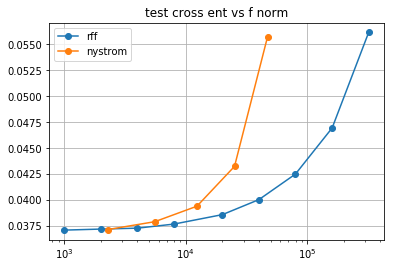

rff f_norm  [ 319701.70542954  160109.18349997   79914.82746903   39991.77264009
   20012.96026426    7987.68220149    4004.61297163    2000.15803758
    1001.60991036]
nystrom f_norm  [ 47131.26521378  25189.45912407  12364.09777367   5555.72814357
   2273.60229262]


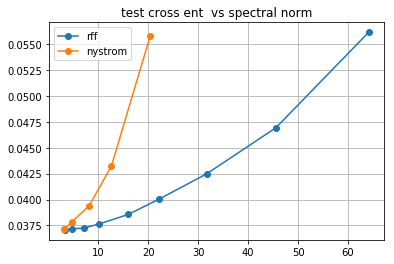

rff spectral norm  [ 64.12488102  45.56240462  31.68887494  22.06865524  15.99988629
  10.24219855   7.19141052   4.73748009   3.4226566 ]
nystrom spectral norm  [ 20.37156875  12.63594892   8.14882773   4.78469815   3.20810843]


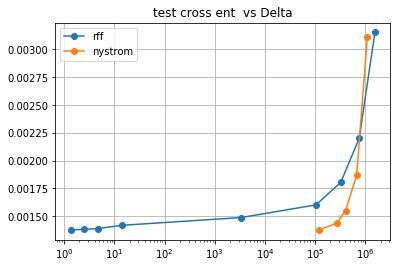

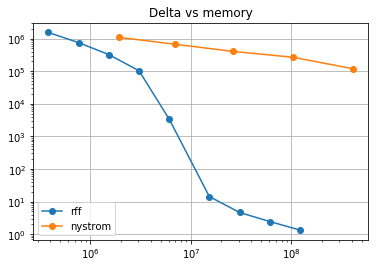

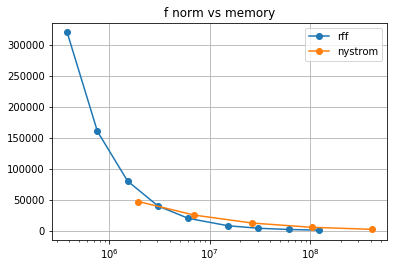

rff f_norm  [ 319701.70542954  160109.18349997   79914.82746903   39991.77264009
   20012.96026426    7987.68220149    4004.61297163    2000.15803758
    1001.60991036]
nystrom f_norm  [ 47131.26521378  25189.45912407  12364.09777367   5555.72814357
   2273.60229262]


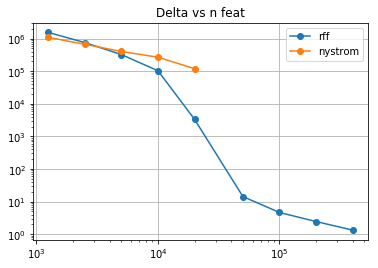

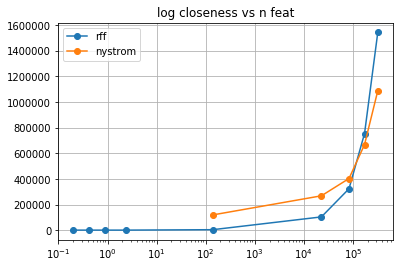

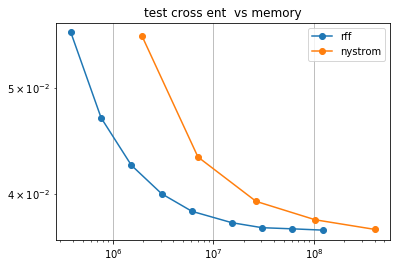

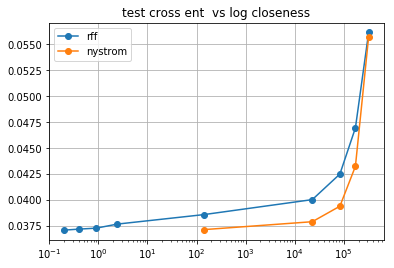

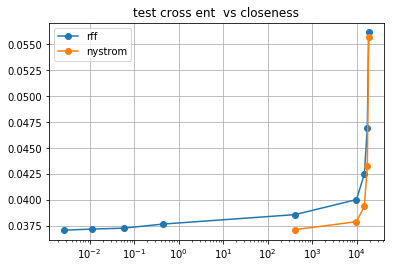

rff closeness  [  1.87302093e+04   1.74802204e+04   1.49802647e+04   9.98050586e+03
   4.12079074e+02   4.40278900e-01   5.82861408e-02   1.14822020e-02
   2.70409595e-03]
nystrom closeness  [ 18730.21070192  17480.22271699  14980.27531946   9981.56421593
    420.82095026]
rff log closeness  [  3.21594725e+05   1.72718929e+05   8.33785710e+04   2.28470433e+04
   1.39436955e+02   2.43061191e+00   9.02663944e-01   4.10914275e-01
   2.02032187e-01]
nystrom log closeness  [  3.21594726e+05   1.72718928e+05   8.33785710e+04   2.28490456e+04
   1.43954428e+02]
rff performance  [ 0.00315228  0.00220243  0.00180463  0.00160113  0.00148728  0.0014177
  0.00138832  0.00138171  0.00137428]
nystrom performance  [ 0.00310721  0.00186817  0.0015507   0.00143508  0.00137804]


In [23]:
plot_l2_vs_measurement(lamb="1e-05", seeds=[1,2,3], 
                       rff_mem_func=rff_mem_func, 
                       nystrom_mem_func=nystrom_mem_func, 
                       do_cross_ent=True)

[ 1088125.50266341   667634.43155079   402871.31840159   267896.25554684
   119603.20756173]
[  1.54338559e+06   7.54149650e+05   3.22952966e+05   1.03142785e+05
   3.32532601e+03   1.42481095e+01   4.62811969e+00   2.44007821e+00
   1.33197854e+00]


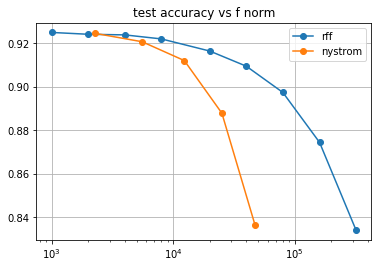

rff f_norm  [ 319701.70542954  160109.18349997   79914.82746903   39991.77264009
   20012.96026426    7987.68220149    4004.61297163    2000.15803758
    1001.60991036]
nystrom f_norm  [ 47131.26521378  25189.45912407  12364.09777367   5555.72814357
   2273.60229262]


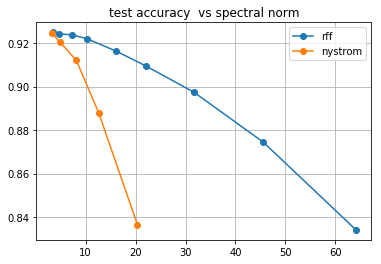

rff spectral norm  [ 64.12488102  45.56240462  31.68887494  22.06865524  15.99988629
  10.24219855   7.19141052   4.73748009   3.4226566 ]
nystrom spectral norm  [ 20.37156875  12.63594892   8.14882773   4.78469815   3.20810843]


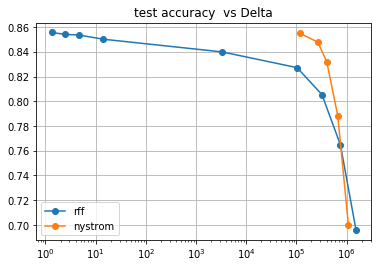

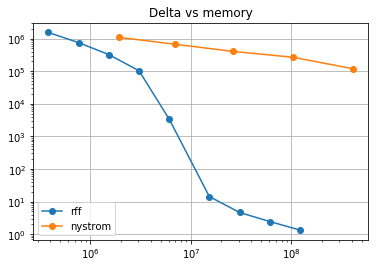

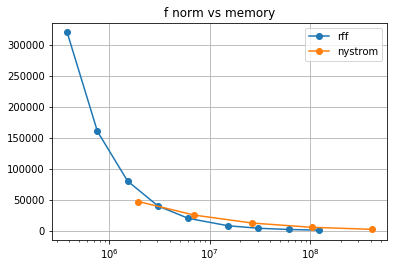

rff f_norm  [ 319701.70542954  160109.18349997   79914.82746903   39991.77264009
   20012.96026426    7987.68220149    4004.61297163    2000.15803758
    1001.60991036]
nystrom f_norm  [ 47131.26521378  25189.45912407  12364.09777367   5555.72814357
   2273.60229262]


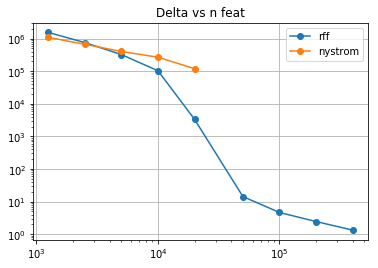

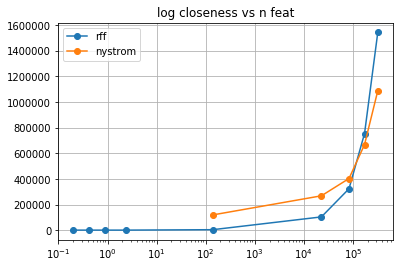

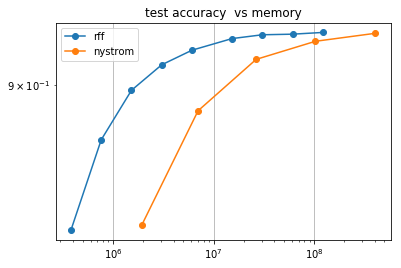

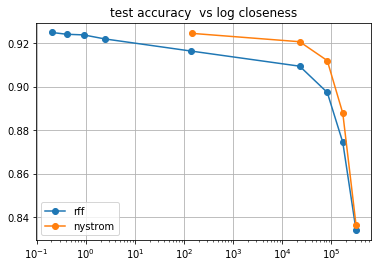

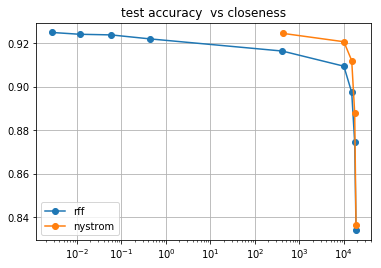

rff closeness  [  1.87302093e+04   1.74802204e+04   1.49802647e+04   9.98050586e+03
   4.12079074e+02   4.40278900e-01   5.82861408e-02   1.14822020e-02
   2.70409595e-03]
nystrom closeness  [ 18730.21070192  17480.22271699  14980.27531946   9981.56421593
    420.82095026]
rff log closeness  [  3.21594725e+05   1.72718929e+05   8.33785710e+04   2.28470433e+04
   1.39436955e+02   2.43061191e+00   9.02663944e-01   4.10914275e-01
   2.02032187e-01]
nystrom log closeness  [  3.21594726e+05   1.72718928e+05   8.33785710e+04   2.28490456e+04
   1.43954428e+02]
rff performance  [ 0.69576667  0.76471667  0.80538333  0.82718333  0.8399      0.85016667
  0.85356667  0.8541      0.85565   ]
nystrom performance  [ 0.69985     0.78831667  0.83188333  0.84776667  0.85488333]


In [24]:
plot_l2_vs_measurement(lamb="1e-05", seeds=[1,2,3], 
                       rff_mem_func=rff_mem_func, 
                       nystrom_mem_func=nystrom_mem_func, 
                       do_cross_ent=False)